## Descripción

Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.
 
## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase  DecisionTreeRegressor.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

## Ejercicio 2: Feature engineering

Identifique si el dtype de cada en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object', realice lo siguiente:
* Genere una recodificación K−1 K-1K−1 en cada variable. 
* Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. 
* Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
* Utilizando el método pd.concat, concatene a los atributos creados en la base de datos.

tip : No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [4]:
new_df = pd.get_dummies(df, drop_first=True)
new_df.sample(5)

Lot_Frontage  Lot_Area  Year_Built  Year_Remod_Add  Mas_Vnr_Area  \
498             98     12203        1998            1999           975   
1897            75      7388        1959            2002             0   
813             64      7040        1979            1979           216   
1211            75      8250        1964            1964           260   
230             94      9259        1927            1950             0   

      BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Total_Bsmt_SF  First_Flr_SF  \
498              3             0          371           1225          1276   
1897             6             0          658           1063          1327   
813              3             0            0           1094          1229   
1211             6             0          305           1092          1092   
230              7             0          660            660           756   

      ...  Sale_Type_ConLw  Sale_Type_New  Sale_Type_Oth  Sale_Type_VWD  \
498   ...                0              0              0              0   
1897  ...                0              0              0              0   
813   ...                0              0              0              0   
1211  ...                0              0              0              0   
230   ...                0              0              0              0   

      Sale_Type_WD   Sale_Condition_AdjLand  Sale_Condition_Alloca  \
498               1                       0                      0   
1897              1                       0                      0   
813               1                       0                      1   
1211              1                       0                      0   
230               1                       0                      0   

      Sale_Condition_Family  Sale_Condition_Normal  Sale_Condition_Partial  
498                       0                      1                       0  
1897                      0                      1                       0  
813                       0                      0                       0  
1211                      0                      1                       0  
230                       0                      1                       0  

[5 rows x 307 columns]

In [5]:
new_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 307 entries, Lot_Frontage to Sale_Condition_Partial
dtypes: float64(2), int64(33), uint8(272)
memory usage: 1.5 MB


## Ejercicio 3: Primer modelo

* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. 
* Reporte las principales métricas de desempeño.
* Comente sobre el desempeño.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns='Sale_Price'),
                                                    new_df['Sale_Price'],
                                                    test_size=.33,
                                                    random_state=16254)

In [7]:
tree = DecisionTreeRegressor(random_state=16254).fit(X_train, y_train) 

In [8]:
print("Test MSE:", mean_squared_error(y_test, tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, tree.predict(X_test)).round(5))

Test MSE: 1912009347.79214
Test MAE: 16537.0
Test R2: 0.73059


**Comentarios:** El error cuadratico medio es alto, aunque tenemos un desempeño bueno siendo que no se han alterado los hiperparametros

## Ejercicio 4: Importancia relativa

* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price.
* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [9]:
colnames = new_df.drop(columns='Sale_Price').columns
df2 = pd.DataFrame({'atributo':colnames, 'importance':tree.feature_importances_}).sort_values(by='importance', ascending=False)
df2 = df2[:10]

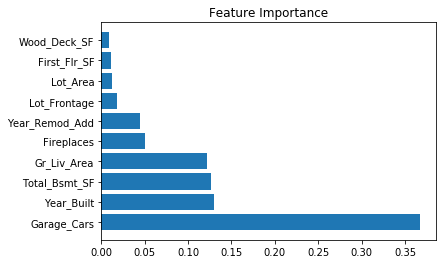

In [10]:
plt.title("Feature Importance")
plt.barh(range(10), df2['importance'])
plt.yticks(range(10), df2['atributo'], rotation=0);

El atributo más importante es la cantidad de garages, junto con los años construida y otras variables como el área total construida y el área del living.

In [11]:
att = list(df2['atributo'])
att.append('Sale_Price')

final_df = new_df.loc[:,att]

## Ejercicio 5: Refactorización del modelo y pickling

* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
* Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
    * Máximo de atributos: Evalúe todos los posibles atributos.
    * Máximo de profundidad: entre 1 a 32.
    * Validaciones cruzadas : 5.
* Reporte la mejor combinación de hiperparámetros y su desempeño asociado. 
* Compare el desempeño en la muestra de validación con el modelo por defecto.

In [12]:
X_tr, X_ts, y_tr, y_ts = train_test_split(final_df.drop(columns='Sale_Price'),
                                                    final_df['Sale_Price'],
                                                    test_size=.33,
                                                    random_state=16254) 

In [13]:
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=16254),
                        {
                            'max_depth':np.linspace(1, 32, 32),
                            'max_features':list(range(1,X_tr.shape[1]))
                        }, cv=5, n_jobs=-1).fit(X_tr, y_tr) 

In [14]:
grid_tree.best_params_ 

{'max_depth': 7.0, 'max_features': 8}

In [15]:
grid_tree.best_score_ 

0.7746901939336069

In [16]:
print("Test MSE:", mean_squared_error(y_ts, grid_tree.best_estimator_.predict(X_ts)).round(5))
print("Test MAE:", median_absolute_error(y_ts, grid_tree.best_estimator_.predict(X_ts)).round(5))
print("Test R2:", r2_score(y_ts, grid_tree.best_estimator_.predict(X_ts)).round(5)) 

Test MSE: 1452561553.24313
Test MAE: 16480.47692
Test R2: 0.79533


MSE es mas bajo y aumentó el desempeño de R2 respecto al modelo inicial.

La elección de los atributos de mayor relevancia mejora el desempeño.

### Pickling

* Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. 
* Para ello importe el módulo pickle.pickle contiene la función dump, que permite guardar el modelo desarrollado. 
* La forma canónica para desarrollar el pickling es:

```python
pickle.dump(<OBJETO_CON_EL_MODELO>, open('nombre-apellido-actividad07.sav', 'wb'))
```

* Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [17]:
import pickle
pickle.dump(grid_tree.best_estimator_, open('pablo_bustamante07.sav', 'wb'))
pickle.dump(X_tr, open('pbustamantei-X_train.sav', 'wb'))
pickle.dump(X_ts, open('pbustamantei-X_test.sav', 'wb'))
pickle.dump(y_tr, open('pbustamantei-y_train.sav', 'wb'))
pickle.dump(y_ts, open('pbustamantei-y_test.sav', 'wb'))